In [47]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras import callbacks
from sklearn.compose import make_column_transformer, make_column_selector
from matplotlib import pyplot as plt

In [34]:
spotify = pd.read_csv('/home/alex/Projects/DataSci/SampleData/Kaggle/spotify.csv')

In [40]:
X = spotify.copy()
# Remove target
y = X.pop('track_popularity')
artist = X['track_artist']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)
preprocessor.fit(X_train)


X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)
input_shape = [X_train.shape[1]]

y_train = y_train / 100 # popularity is on a scale 0-100, so this rescales to 0-1.
y_test = y_test / 100


Epoch 1/50


/home/alex/Projects/DataSci/.datasci/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2885 - val_loss: 0.2047
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2025 - val_loss: 0.1991
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1964 - val_loss: 0.1977
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1935 - val_loss: 0.1972
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1899 - val_loss: 0.1958
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1884 - val_loss: 0.1956
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1898 - val_loss: 0.1952
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1874 - val_loss: 0.1951
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1862 - val_loss: 0.1944
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1848 - val_loss: 0.1947
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1862 - val_loss: 0.1934
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1835 - val_loss: 0.1935


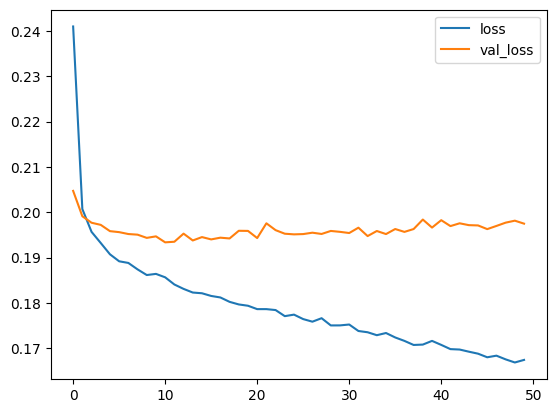

In [46]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=50,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

In [48]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)


Epoch 1/50


/home/alex/Projects/DataSci/.datasci/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2390 - val_loss: 0.2035
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2026 - val_loss: 0.1997
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1963 - val_loss: 0.1973
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1919 - val_loss: 0.2029
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1921 - val_loss: 0.1965
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1893 - val_loss: 0.1960
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1875 - val_loss: 0.1958
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1868 - val_loss: 0.1954
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1848 - val_loss: 0.1955
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1853 - val_loss: 0.1961
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1848 - val_loss: 0.1957
Minimum Validation Loss: 0.1954


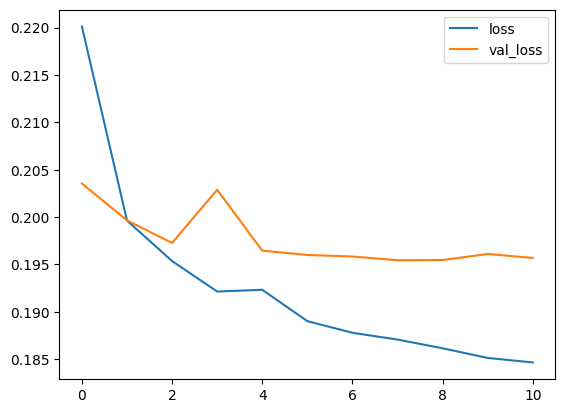

In [50]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),    
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=50,
    callbacks=[early_stopping]
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));